In [42]:
import pandas as pd
import pyarrow.parquet as pq

price_file = "alpha_vantage_IBM_2025-01-26.parquet"
overview_file = "company_overview_IBM_2025-01-26.parquet"

df_price = pd.read_parquet(price_file)
df_overview = pd.read_parquet(overview_file)

In [43]:
# Display data samples
print("Stock Price Data Sample:")
print(df_price.head())

print("\nCompany Overview Data Sample:")
print(df_overview.head())

Stock Price Data Sample:
           1. open 2. high 3. low 4. close 5. volume      SMA
1999-11-29    None    None   None     None      None  49.5621
1999-11-30    None    None   None     None      None  49.7252
1999-12-01    None    None   None     None      None  49.9466
1999-12-02    None    None   None     None      None  50.2261
1999-12-03    None    None   None     None      None  50.7440

Company Overview Data Sample:
  Symbol     AssetType                             Name  \
0    IBM  Common Stock  International Business Machines   

                                         Description    CIK Exchange Currency  \
0  International Business Machines Corporation (I...  51143     NYSE      USD   

  Country      Sector                     Industry  ... EVToRevenue  \
0     USA  TECHNOLOGY  COMPUTER & OFFICE EQUIPMENT  ...       4.063   

  EVToEBITDA  Beta 52WeekHigh 52WeekLow 50DayMovingAverage  \
0       20.1  0.71     239.35    158.38             222.95   

  200DayMovingAverage 

In [44]:
# Inspect Parquet file metadata and schema
price_parquet = pq.ParquetFile(price_file)
overview_parquet = pq.ParquetFile(overview_file)

print("\nPrice File Metadata:")
print(price_parquet.metadata)

print("\nCompany Overview Metadata:")
print(overview_parquet.metadata)

print("\nPrice File Schema:")
print(price_parquet.schema)

print("\nCompany Overview Schema:")
print(overview_parquet.schema)


Price File Metadata:
  created_by: parquet-cpp-arrow version 17.0.0
  num_columns: 7
  num_rows: 6328
  num_row_groups: 1
  format_version: 2.6
  serialized_size: 4037

Company Overview Metadata:
  created_by: parquet-cpp-arrow version 17.0.0
  num_columns: 52
  num_rows: 1
  num_row_groups: 1
  format_version: 2.6
  serialized_size: 27811

Price File Schema:
required group field_id=-1 schema {
  optional binary field_id=-1 1. open (String);
  optional binary field_id=-1 2. high (String);
  optional binary field_id=-1 3. low (String);
  optional binary field_id=-1 4. close (String);
  optional binary field_id=-1 5. volume (String);
  optional binary field_id=-1 SMA (String);
  optional int64 field_id=-1 __index_level_0__ (Timestamp(isAdjustedToUTC=false, timeUnit=nanoseconds, is_from_converted_type=false, force_set_converted_type=false));
}


Company Overview Schema:
required group field_id=-1 schema {
  optional binary field_id=-1 Symbol (String);
  optional binary field_id=-1 AssetT

In [45]:
# Statistical Summary of Data
print("\nStock Price Data - Summary Statistics:")
print(df_price.describe())

print("\nCompany Overview Data - Summary Statistics:")
print(df_overview.describe())


Stock Price Data - Summary Statistics:
         1. open   2. high    3. low  4. close 5. volume      SMA
count        100       100       100       100       100     6328
unique        95        99        97       100       100     6290
top     223.3500  221.3200  230.2600  202.1300   4750999  44.0813
freq           3         2         3         1         1        2

Company Overview Data - Summary Statistics:
       Symbol     AssetType                             Name  \
count       1             1                                1   
unique      1             1                                1   
top       IBM  Common Stock  International Business Machines   
freq        1             1                                1   

                                              Description    CIK Exchange  \
count                                                   1      1        1   
unique                                                  1      1        1   
top     International Business Ma

In [46]:
# Check for missing values
print("\nMissing values in Stock Price Data:")
print(df_price.isnull().sum())

print("\nMissing values in Company Overview Data:")
print(df_overview.isnull().sum())


Missing values in Stock Price Data:
1. open      6228
2. high      6228
3. low       6228
4. close     6228
5. volume    6228
SMA             0
dtype: int64

Missing values in Company Overview Data:
Symbol                        0
AssetType                     0
Name                          0
Description                   0
CIK                           0
Exchange                      0
Currency                      0
Country                       0
Sector                        0
Industry                      0
Address                       0
OfficialSite                  0
FiscalYearEnd                 0
LatestQuarter                 0
MarketCapitalization          0
EBITDA                        0
PERatio                       0
PEGRatio                      0
BookValue                     0
DividendPerShare              0
DividendYield                 0
EPS                           0
RevenuePerShareTTM            0
ProfitMargin                  0
OperatingMarginTTM            0


In [47]:
# Convert data types for numeric columns
columns_to_convert = ['1. open', '2. high', '3. low', '4. close', '5. volume', 'SMA']
df_price[columns_to_convert] = df_price[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Handling missing values (forward-fill)
df_price.fillna(method='ffill', inplace=True)

# Save cleaned data
cleaned_price_file = "alpha_vantage_cleaned.parquet"
df_price.to_parquet(cleaned_price_file)

print(f"\nCleaned stock price data saved to {cleaned_price_file}")


Cleaned stock price data saved to alpha_vantage_cleaned.parquet


/var/folders/f_/mxzw7mdx4qg8bs9xn0wbblsw0000gn/T/ipykernel_23575/2084157104.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_price.fillna(method='ffill', inplace=True)


In [48]:
# Convert company overview numeric fields
numeric_columns = [
    "MarketCapitalization", "EBITDA", "PERatio", "PEGRatio", "BookValue",
    "DividendPerShare", "DividendYield", "EPS", "RevenueTTM", "GrossProfitTTM",
    "Beta", "52WeekHigh", "52WeekLow", "50DayMovingAverage", "200DayMovingAverage"
]

df_overview[numeric_columns] = df_overview[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [49]:
# Save cleaned company overview data
cleaned_overview_file = "company_overview_cleaned.parquet"
df_overview.to_parquet(cleaned_overview_file)

print(f"\nCleaned company overview data saved to {cleaned_overview_file}")


Cleaned company overview data saved to company_overview_cleaned.parquet


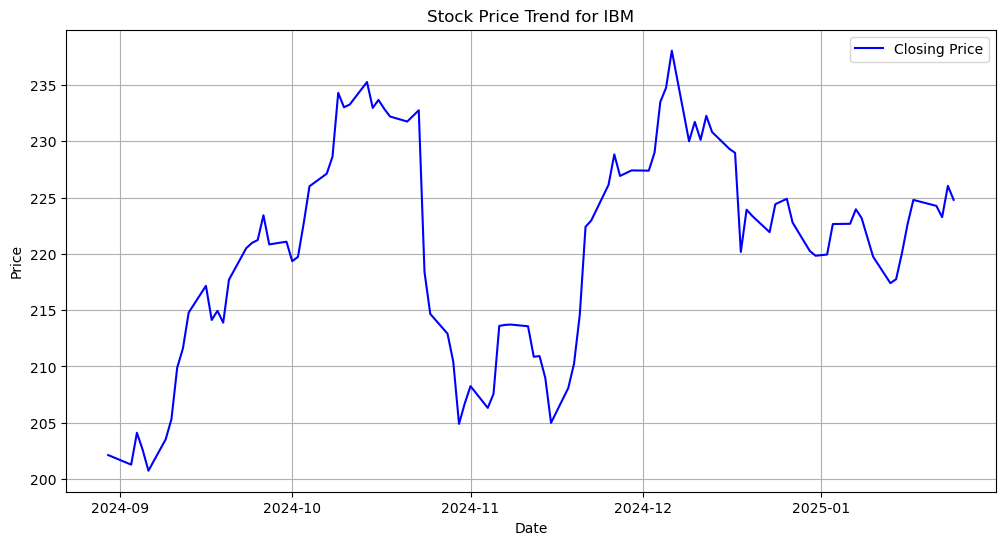

In [50]:
import matplotlib.pyplot as plt

# Plot stock closing prices
df_price['4. close'] = pd.to_numeric(df_price['4. close'], errors='coerce')

plt.figure(figsize=(12, 6))
plt.plot(df_price.index, df_price['4. close'], label='Closing Price', color='blue')
plt.title("Stock Price Trend for IBM")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()
